## Predicting Mortality from Heart Disease and Diabetes Using Social Determinants of Health

##### *How will healthcare systems and the insurance industry adapt to changing climatic conditions and social determinants of health?*

**Project Description:**
This project explores the impact of social determinants of health (SDOH) and environmental factors on mortality rates from heart disease and diabetes. It seeks to understand how these external factors contribute to the burden on healthcare systems and insurance expenditures.

**Relevance:** Given the global prevalence of heart disease and diabetes, understanding the broader determinants of health is crucial for developing effective prevention and management strategies.

**Affected Parties:** This research primarily impacts the general public, healthcare providers, and insurance companies, with a focus on the U.S. population.

**Occurrence:** This ongoing issue is exacerbated by the current trends in climate change, urbanization, and socio-economic disparities.

**Motivation:** Our team is driven by the potential to influence public health policies and healthcare practices through our findings, contributing to more resilient healthcare systems and communities.

**Team**
* Ashwin Kandath - akandath@andrew.cmu.edu
* Nicolle Vigil - nvigil@andrew.cmu.edu
* Siva Komaragiri - skomarag@andrew.cmu.edu



#### QUESTION 1
##### What are the most important socio-economic and environmental factors that lead to heart diease related deaths in adults above the age of 35 year in the United States?
*Prediction of heart related deaths using various socio economic and environmental factors*


#### Imports

In [1]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.linear_model import Lasso, ElasticNet, RidgeClassifier, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector

# Visualization
from yellowbrick.target import ClassBalance
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

# Setting for notebook display
%matplotlib inline
sns.set_style("whitegrid")

### 1. Data Loading

We load the dataset that was created for cleaning the original SDOH dataset from 2017 (Done in notebook named ['SDOH_DataCleaning_Code'](https://github.com/MLFP-90803-SP24-TeamPractice/sprint2-90803-sp24-team-9/blob/main/SDOH_DataCleaning_Code.ipynb))

In [2]:
data = pd.read_csv('sdoh_FINAL.csv')
data.head()

,YEAR,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,...,POS_HOSP_PSYCH_RATE,POS_TOT_HOSP_AMBULANCE,POS_HOSP_AMBULANCE_RATE,POS_TOT_HOSP_CHEMO,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV
0,2017,South,0,55036.0,54293.0,51898.0,44109.0,42974.0,2746.0,36757.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.02,50.00,38.89,11.11
1,2017,South,0,203360.0,201089.0,191854.0,166364.0,163759.0,10031.0,143022.0,...,0.0,0.0,0.00,0.0,0.00,3.0,0.01,63.49,36.51,0.00
2,2017,South,0,26201.0,25925.0,24765.0,21627.0,21241.0,1071.0,18434.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.04,73.33,20.00,6.67
3,2017,South,0,22580.0,22224.0,21301.0,18743.0,18415.0,1137.0,15859.0,...,0.0,1.0,0.04,1.0,0.04,1.0,0.04,27.27,45.45,27.27
4,2017,South,0,57667.0,57088.0,54171.0,46501.0,45924.0,3224.0,39475.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.02,60.00,40.00,0.00


In [3]:
# Check Null Values
data.isnull().sum().sum()

0

Since 'YEAR' is 2017 across the dataset and 'TERRITORY' doesn't give us any value able insight/data, we remove these columns.

In [4]:
# Dropping year and territory
data = data.drop(['YEAR', 'TERRITORY'], axis=1)

Also, since we are predicting deaths due to heart diseases above the age of 35, other variables relating to heart disease related deaths could be stringly correlated. So we chose to remove these variables as well from the dataset.

#### 2. Visualizations

We try to visualize the dataset to see what the data could answer and how the data is distributed.

<Axes: >

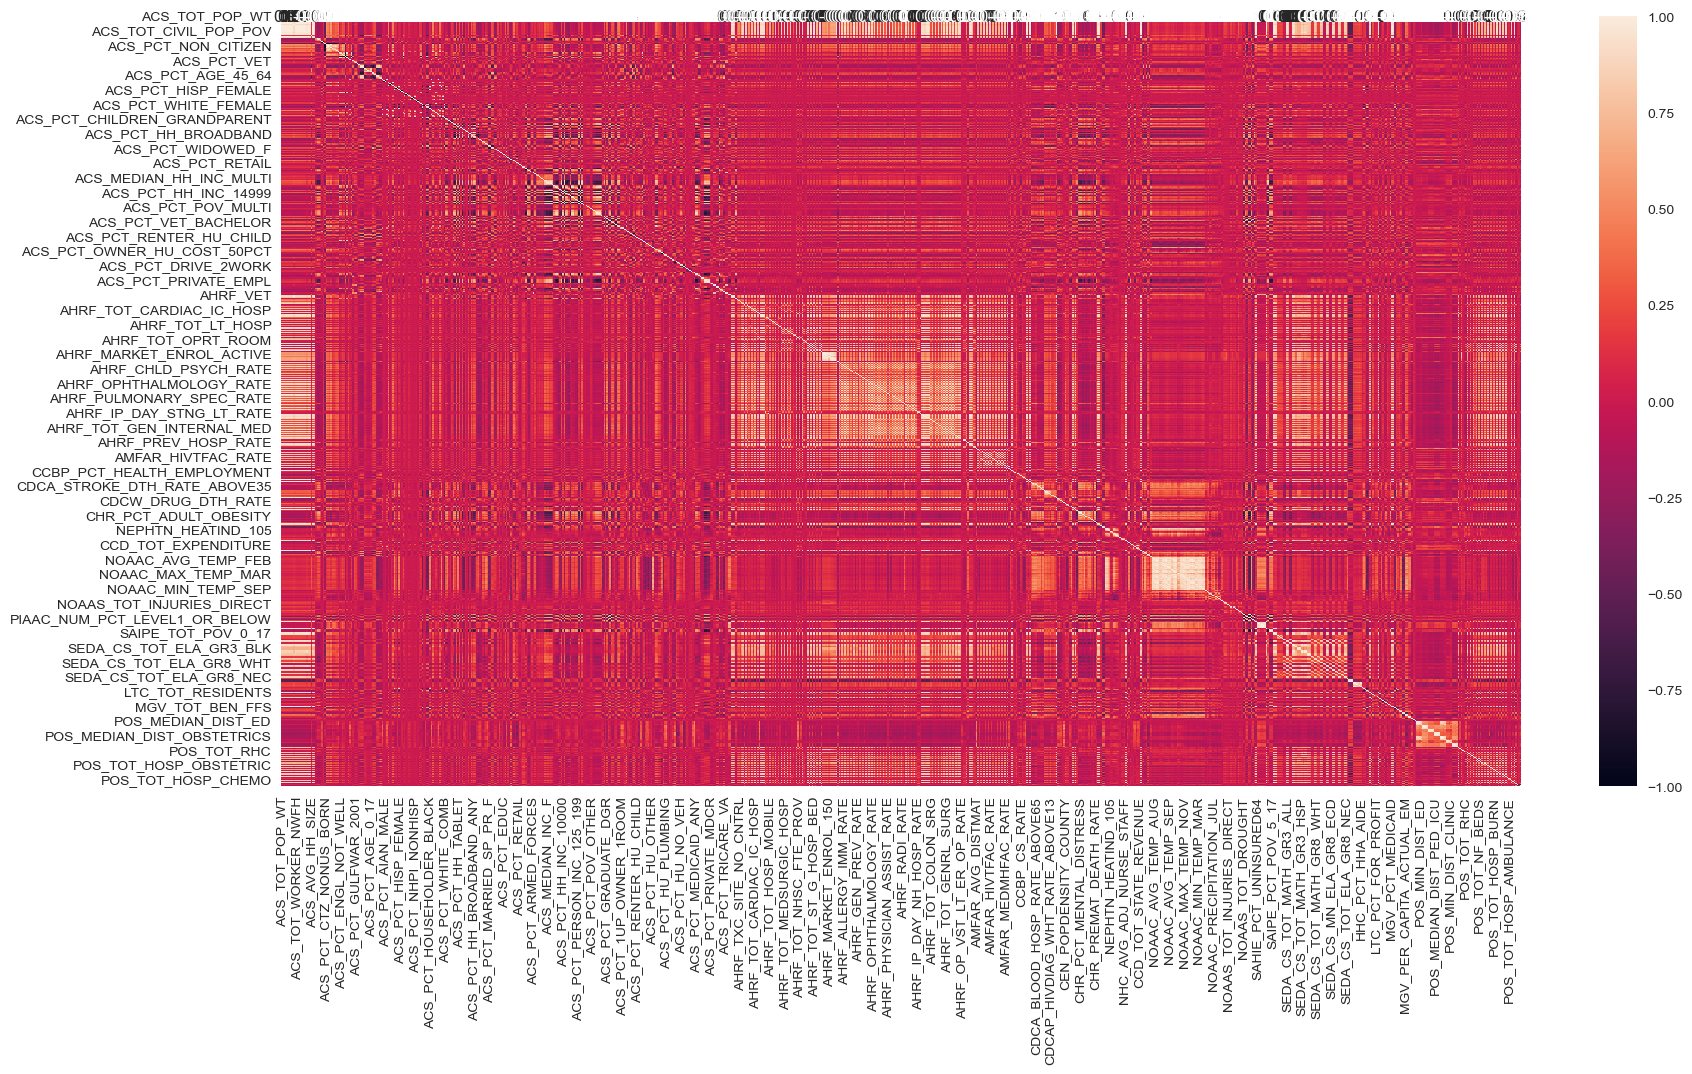

In [5]:
# Correlation Matrix

cat_cols = data.select_dtypes(include=['object']).columns

# Remove catoegorical columns
data_corr = data.drop(cat_cols,axis=1)

# Correlation Matrix
corr = data_corr.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

The correlation plot is very vast, given we have a large number of features in the dataset. However, we can deduce from the visual that the variables are fairly uncorrelated, except some [Area Health Resource Files](https://data.hrsa.gov/topics/health-workforce/ahrf) variables and [National Oceanic and Atmospheric Administration](https://www.noaa.gov/about-our-agency) variables.

##### Since we are interested to understand the pollution levels across regions, we plot a boxplot of PM2.5 levels across regions.

<Axes: xlabel='REGION', ylabel='WUSTL_AVG_PM25'>

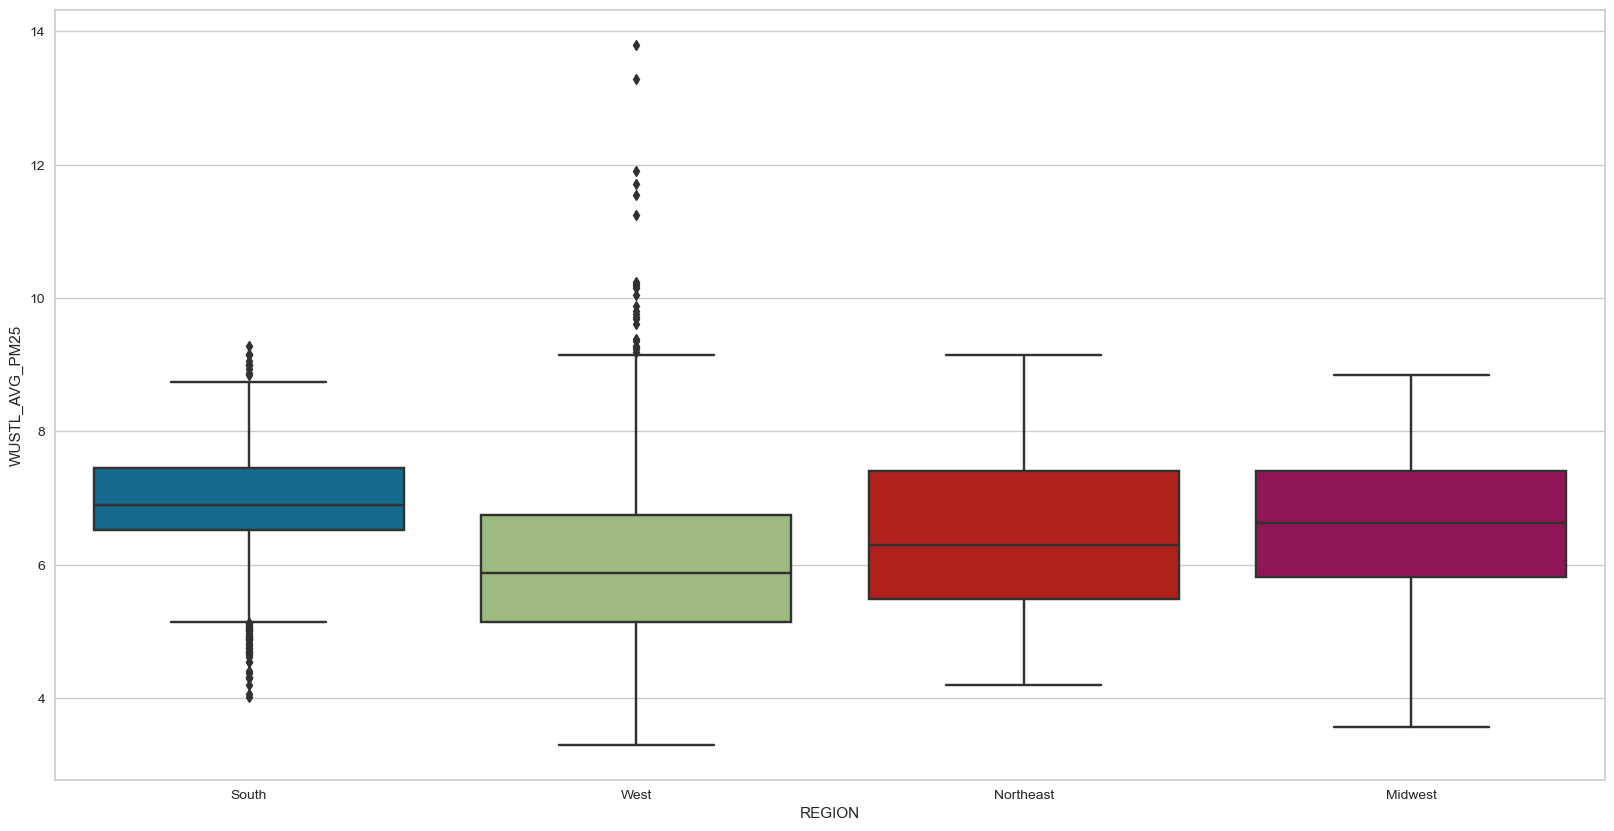

In [6]:
# Box plot of PM2.5, hue = region
plt.figure(figsize=(20,10))

sns.boxplot(x='REGION',y='WUSTL_AVG_PM25',data=data)

We can see the the distribution of PM2.5 levels across regions is almost similar.

##### There is also said to be a strong relationship between diabetes and heart disease related deaths in the US. We try to visualize the relationship between those variables in our dataset.

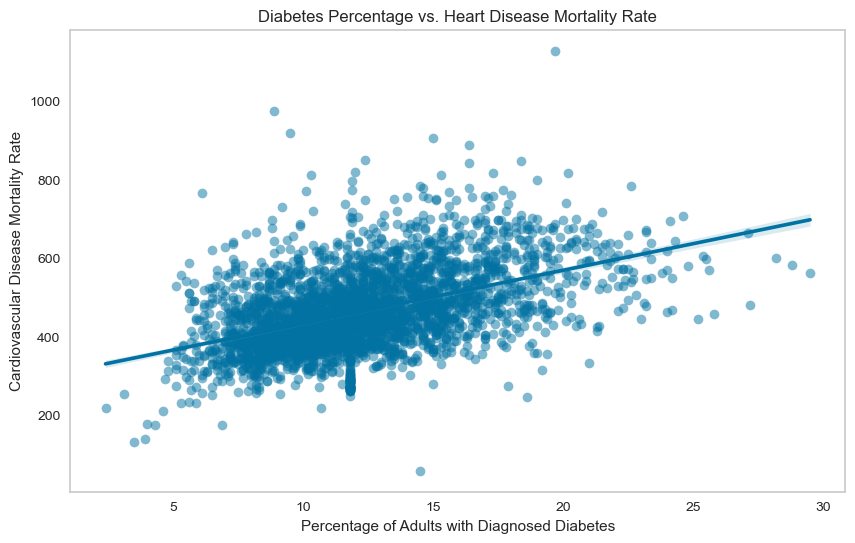

In [7]:
# Regplot

plt.figure(figsize=(10, 6))
sns.regplot(x='CHR_PCT_DIABETES', y='CDCA_HEART_DTH_RATE_ABOVE35', data=data, scatter_kws={'alpha':0.5})
plt.title('Diabetes Percentage vs. Heart Disease Mortality Rate')
plt.xlabel('Percentage of Adults with Diagnosed Diabetes')
plt.ylabel('Cardiovascular Disease Mortality Rate')
plt.grid(False)
plt.show()

We can see that the regions were percentage of people diagnosed with diabetes is higher, there seem to be higher levels of cardiovascular disease deaths.  

#### 3. Feature Encoding

We look for categorical features in our dataset and encode them so that we could use them for prediction

In [8]:
# Categorical columns
cat_cols

Index(['REGION'], dtype='object')

We have only one categorical feature, namely 'REGION'. Thus, we encode this feature.

In [9]:
# One hot encoding on only REGION

data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

#### 4. Defining target variable

Now, we finally define are dependent variable (y) and the independent variables (X), and split them into train and test data.

In [10]:
# Target variable
y = data['CDCA_HEART_DTH_RATE_ABOVE35']
X = data.drop(['CDCA_HEART_DTH_RATE_ABOVE35'],axis=1)

In [11]:
# Splitting in X_train, X_test, y_train, y_test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

#### 5. Scaling the data

We examine some descriptive statistics of the data to figure out the characteristics of the data.

In [12]:
# Describe X_train

X_train.describe()

,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,...,POS_HOSP_PSYCH_RATE,POS_TOT_HOSP_AMBULANCE,POS_HOSP_AMBULANCE_RATE,POS_TOT_HOSP_CHEMO,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV
count,2.580000e+03,2.580000e+03,2.580000e+03,2.580000e+03,2.580000e+03,2580.000000,2.580000e+03,2.580000e+03,2580.000000,2.580000e+03,...,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,1.043023e+05,1.025236e+05,9.783336e+04,8.446280e+04,8.310207e+04,5554.760853,7.017759e+04,8.003421e+04,5959.441473,2.097667e+04,...,0.016050,0.016667,0.000678,0.738372,0.015225,2.652713,0.097984,58.290008,28.933291,10.834302
std,3.476608e+05,3.434271e+05,3.251950e+05,2.807640e+05,2.763188e+05,18328.399787,2.332607e+05,2.665282e+05,14910.663624,6.972340e+04,...,0.041107,0.139632,0.009689,1.756879,0.043731,5.484471,0.172062,22.932914,17.265847,15.671572
min,7.400000e+01,7.400000e+01,7.400000e+01,6.700000e+01,6.700000e+01,0.000000,6.400000e+01,6.700000e+01,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.123300e+04,1.117775e+04,1.060900e+04,9.079750e+03,8.955750e+03,546.750000,7.752000e+03,8.670000e+03,713.500000,2.120000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,47.932500,18.180000,0.000000
50%,2.584375e+04,2.539050e+04,2.449750e+04,2.130700e+04,2.095100e+04,1329.500000,1.786450e+04,2.024850e+04,1668.500000,5.007000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.040000,60.710000,28.570000,5.055000
75%,6.674950e+04,6.478850e+04,6.325600e+04,5.483425e+04,5.388075e+04,3648.250000,4.488050e+04,5.170600e+04,4796.250000,1.315225e+04,...,0.020000,0.000000,0.000000,1.000000,0.010000,3.000000,0.110000,73.330000,38.802500,14.290000
max,1.010572e+07,9.988370e+06,9.473811e+06,8.227851e+06,8.102402e+06,543922.000000,6.801851e+06,7.828690e+06,275746.000000,1.893541e+06,...,0.830000,2.000000,0.310000,33.000000,0.890000,145.000000,2.770000,100.000000,100.000000,100.000000


In [13]:
# Describe X_val

X_val.describe()

,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,...,POS_HOSP_PSYCH_RATE,POS_TOT_HOSP_AMBULANCE,POS_HOSP_AMBULANCE_RATE,POS_TOT_HOSP_CHEMO,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV
count,3.230000e+02,3.230000e+02,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,...,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,7.186585e+04,7.107316e+04,67541.201238,58165.916409,57197.820433,3767.755418,48829.352941,55078.470588,4615.746130,14685.566563,...,0.020898,0.024768,0.003870,0.603715,0.015325,2.204334,0.102260,57.243932,29.621734,11.895789
std,1.344166e+05,1.328947e+05,126205.013603,108479.819564,106625.952440,7046.856593,91333.767939,102802.799134,8048.264338,28736.098478,...,0.059794,0.155658,0.033809,1.102335,0.037913,2.043406,0.164655,23.495737,17.855335,17.517565
min,4.210000e+02,4.210000e+02,410.000000,307.000000,298.000000,11.000000,264.000000,289.000000,23.000000,119.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.230750e+04,1.230850e+04,11543.500000,9758.500000,9592.500000,598.000000,8189.000000,9253.000000,771.500000,2193.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.015000,45.225000,17.625000,0.000000
50%,2.629000e+04,2.548300e+04,24426.000000,21400.000000,21121.000000,1347.000000,17789.000000,20418.000000,1781.000000,5118.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.040000,60.660000,28.130000,5.260000
75%,5.919550e+04,5.855400e+04,55947.000000,48447.000000,47630.000000,3190.500000,41164.000000,46075.500000,4132.000000,11503.500000,...,0.020000,0.000000,0.000000,1.000000,0.010000,3.000000,0.110000,72.805000,39.175000,16.670000
max,1.039198e+06,1.027192e+06,972242.000000,836685.000000,822213.000000,55774.000000,713454.000000,792380.000000,64959.000000,236036.000000,...,0.530000,1.000000,0.440000,11.000000,0.300000,17.000000,1.280000,100.000000,100.000000,100.000000


We can clearly see that the 'ranges' of various features are very different. Thus we scale the data using standard scaling. We did not normalize becasue there might be variables that might be negatively related with the target variable.

In [14]:
# Standard Scaling of X_train and X_test

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


#### 6. Modelling

#### Model 1: Linear Regression

Using this model, we can predict the mortality rates from heart disease (CDCA_HEART_DTH_RATE_ABOVE35) based on the socio-economic and environmental factors provided in the dataset. The coefficients of the linear regression model will help identify which factors have a positive or negative impact on mortality rates.

In [24]:
# Multiple linear regression
lr = LinearRegression()

# Fit the model
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_val_lr = lr.predict(X_val_scaled)
y_pred_train_lr = lr.predict(X_train_scaled)

# R2 Score

r2_train_lr = r2_score(y_train, y_pred_train_lr)
print(f'R^2 Score on Train: {r2_train_lr}')

r2_val_lr = r2_score(y_val, y_pred_val_lr)
print(f'R^2 Score on Validation: {r2_val_lr}')

# Mean Squared Error

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
print(f'Mean Squared Error on Train: {mse_train_lr}')

mse_val_lr = mean_squared_error(y_val, y_pred_val_lr)
print(f'Mean Squared Error on Validation: {mse_val_lr}')

#

R^2 Score on Train: 0.9039640076731715
R^2 Score on Validation: 0.7707037997294875
Mean Squared Error on Train: 993.7044527110877
Mean Squared Error on Validation: 2666.017457442337


In [22]:
# Cross Validation
cv_score_lr = cross_val_score(lr, X_train_scaled, y_train, cv=10)
print(f'Cross Validation Scores: {cv_score_lr.mean()}')

Cross Validation Scores: -3.1872800718045613


We observe that

* The R^2 is on train is pretty high, around 90%
* The MSE on train is relatively good, given the size of the dataset
* The same values for validation are around 77% and 2666, which is different from the train ones
* Cross Validation Score is ~-3, which suggests that the model might not be fitting properly

##### Feature Importance

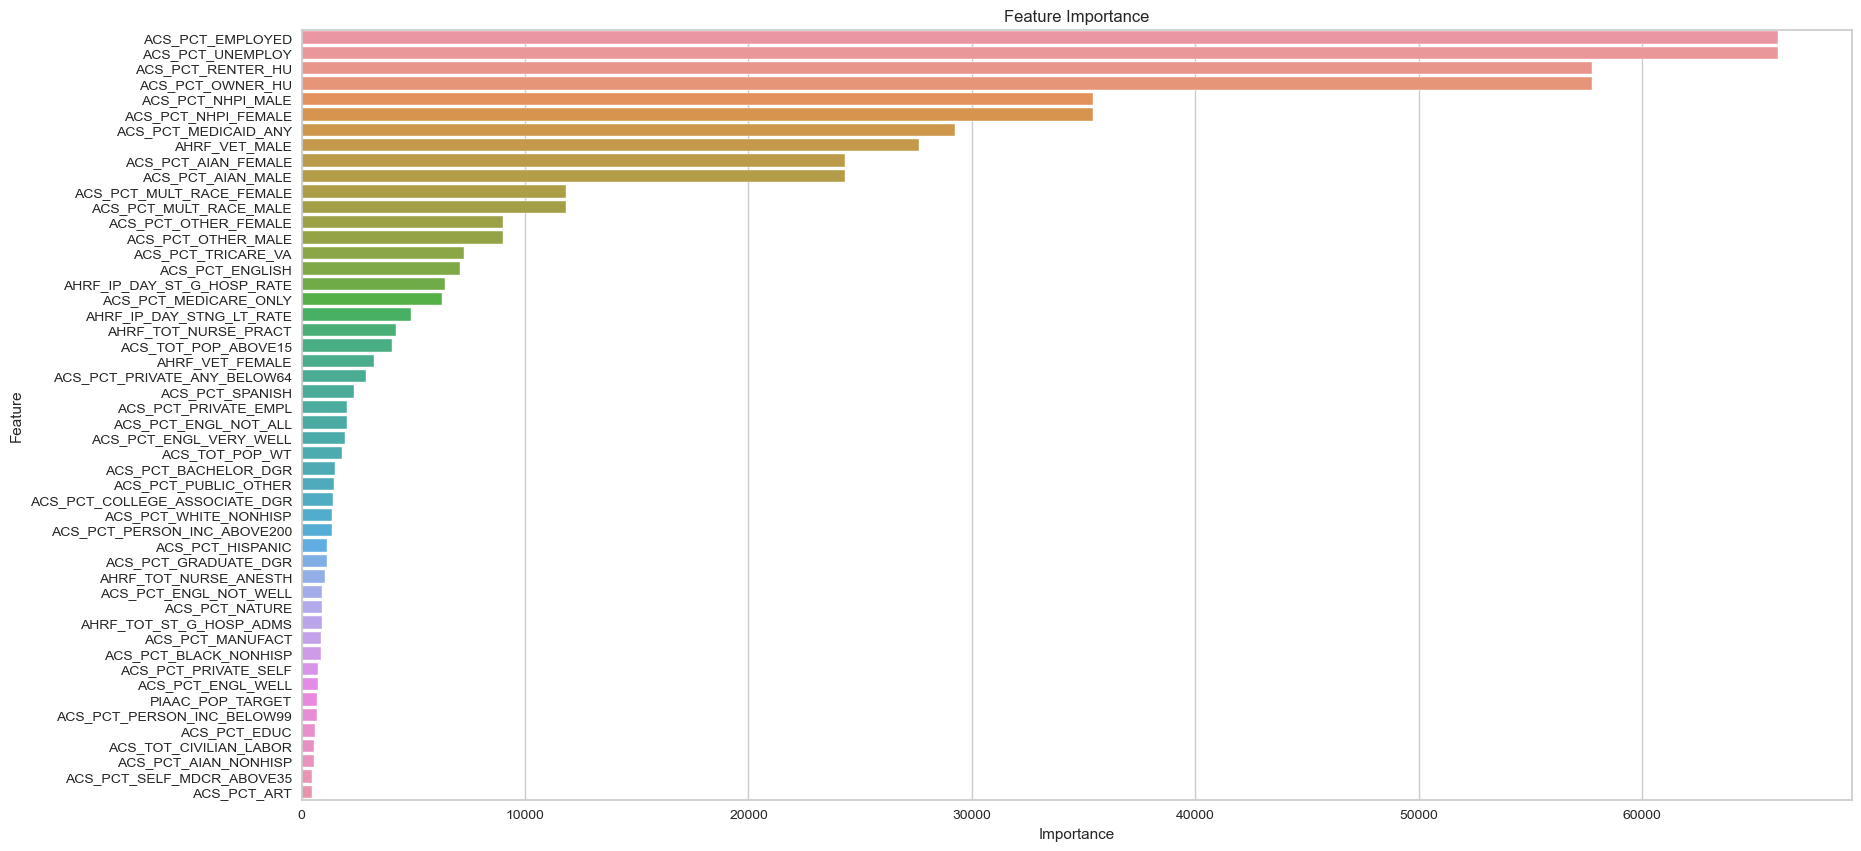

In [25]:
# Plot Best features
plt.figure(figsize=(20,10))
feature_importance_lr = pd.DataFrame({'Feature':X.columns, 'Importance':lr.coef_})
feature_importance_lr = feature_importance_lr.sort_values(by='Importance', ascending=False).head(50)
sns.barplot(x='Importance', y='Feature', data=feature_importance_lr)
plt.title('Feature Importance')
plt.show()

Top 10 Social Determinants of Health (SDOH) Variables for Linear Regression

1. **ACS_PCT_EMPLOYED**: Percentage of employed individuals in the population.
2. **ACS_PCT_UNEMPLOY**: Percentage of unemployed individuals in the population.
3. **ACS_PCT_RENTER_HU**: Percentage of housing units occupied by renters.
4. **ACS_PCT_OWNER_HU**: Percentage of housing units occupied by owners.
5. **ACS_PCT_NHPI_MALE**: Percentage of Native Hawaiian and Other Pacific Islander (NHPI) males in the population.
6. **ACS_PCT_NHPI_FEMALE**: Percentage of Native Hawaiian and Other Pacific Islander (NHPI) females in the population.
7. **ACS_PCT_MEDICAID_ANY**: Percentage of individuals with Medicaid coverage.
8. **AHRF_VET_MALE**: Number of male veterans based on the Area Health Resources Files (AHRF).
9. **ACS_PCT_AIAN_FEMALE**: Percentage of American Indian and Alaska Native (AIAN) females in the population.
10. **ACS_PCT_AIAN_MALE**: Percentage of American Indian and Alaska Native (AIAN) males in the population.


Employment status emerges as the most influential factor, followed closely by housing tenure. Demographic factors, particularly those related to specific ethnic groups, exhibit substantial importance. Additionally, access to healthcare coverage and veteran status also wield significant influence.

We would now want to explore Ridge Regression model to handle the fitting issues (suggested by -ve CV score)

#### Model 2: Ridge Regression

Ridge regression will help us predict mortality rates from heart disease based on socio-economic and environmental factors while mitigating the risk of overfitting. It considers all features in the dataset and assigns weights to them, with the regularization term helping to control the complexity of the model.

In [15]:
# Ridge
ridge = Ridge(alpha=0.1)

# Fit the model
ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred_val_ridge = ridge.predict(X_val_scaled)
y_pred_train_ridge = ridge.predict(X_train_scaled)

# R2 Score

r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print(f'R^2 Score on Train: {r2_train_ridge}')

r2_val_ridge = r2_score(y_val, y_pred_val_ridge)
print(f'R^2 Score on Validation: {r2_val_ridge}')

# Mean Squared Error

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
print(f'Mean Squared Error on Train: {mse_train_ridge}')

mse_val_ridge = mean_squared_error(y_val, y_pred_val_ridge)
print(f'Mean Squared Error on Validation: {mse_val_ridge}')

R^2 Score on Train: 0.8987551615077869
R^2 Score on Validation: 0.7790387368938576
Mean Squared Error on Train: 1047.6014709291603
Mean Squared Error on Validation: 2569.1074870168354


We can observe that:
* R^2 for train is pretty good, ~89%,, while the same for validation is ~78%
* The MSE is also decent for train, given the size of the dataset. It is almost 2.5x for validation, which is not a good sign.

##### Hyper-parameter tuning

We experiment with different sets of regularization parameters (called alphas) of a Ridge regression to see which one yields the best performance. 

In [16]:
alphas = np.logspace(-2, 8, 100)

# Create a list where you will store the information
model_ridge_coefficients = []
mse_train_ridge_experiments = []
mse_val_ridge_experiments = []

# Try each set of alphas in your Ridge model
for a in alphas:
    # Step 1: Pick the model type by initializing a model object and set the alpha from the list as a model parameter
    model_ridge = Ridge() # optional step because we already did in the previous cell
    model_ridge.set_params(alpha=a)

    # Step 2: Train the model by passing some data. Again, make sure to pass pre-processed X_train and X_test
    model_ridge.fit(X_train_scaled, y_train)

    # Step 3: Get predictions
    y_pred_train_ridge_experiment = model_ridge.predict(X_train_scaled)
    y_pred_val_ridge_experiment = model_ridge.predict(X_val_scaled)

    # Step 4: Evaluate the model performance (let's do just MSE this time)
    mse_train_ridge_experiment = mean_squared_error(y_train, y_pred_train_ridge_experiment)
    mse_val_ridge_experiment = mean_squared_error(y_val, y_pred_val_ridge_experiment)

    # Append all results to the lists so we could look at them and also plot them
    model_ridge_coefficients.append(model_ridge.coef_)
    mse_train_ridge_experiments.append(mse_train_ridge_experiment)
    mse_val_ridge_experiments.append(mse_val_ridge_experiment)


In [17]:
# Find the lowest MSE val value

min_mse_test_ridge = np.min(mse_val_ridge_experiments)
print("Min MSE Test: ", min_mse_test_ridge)

# The index of the lowest MSE value
min_mse_val_index = np.argmin(mse_val_ridge_experiments)
print(f'Index of the lowest MSE on Validation: {min_mse_val_index}')

# Call alphas with the index of the lowest MSE test value
best_alpha = alphas[min_mse_val_index]
print(f'Best Alpha: {best_alpha}')

Min MSE Test:  2022.7087763984466
Index of the lowest MSE on Validation: 45
Best Alpha: 351.11917342151276


The best alpha is 351

##### We plot the coefficients and MSE values against alpha and see how does increasing alpha impact the model coefficients and MSEs

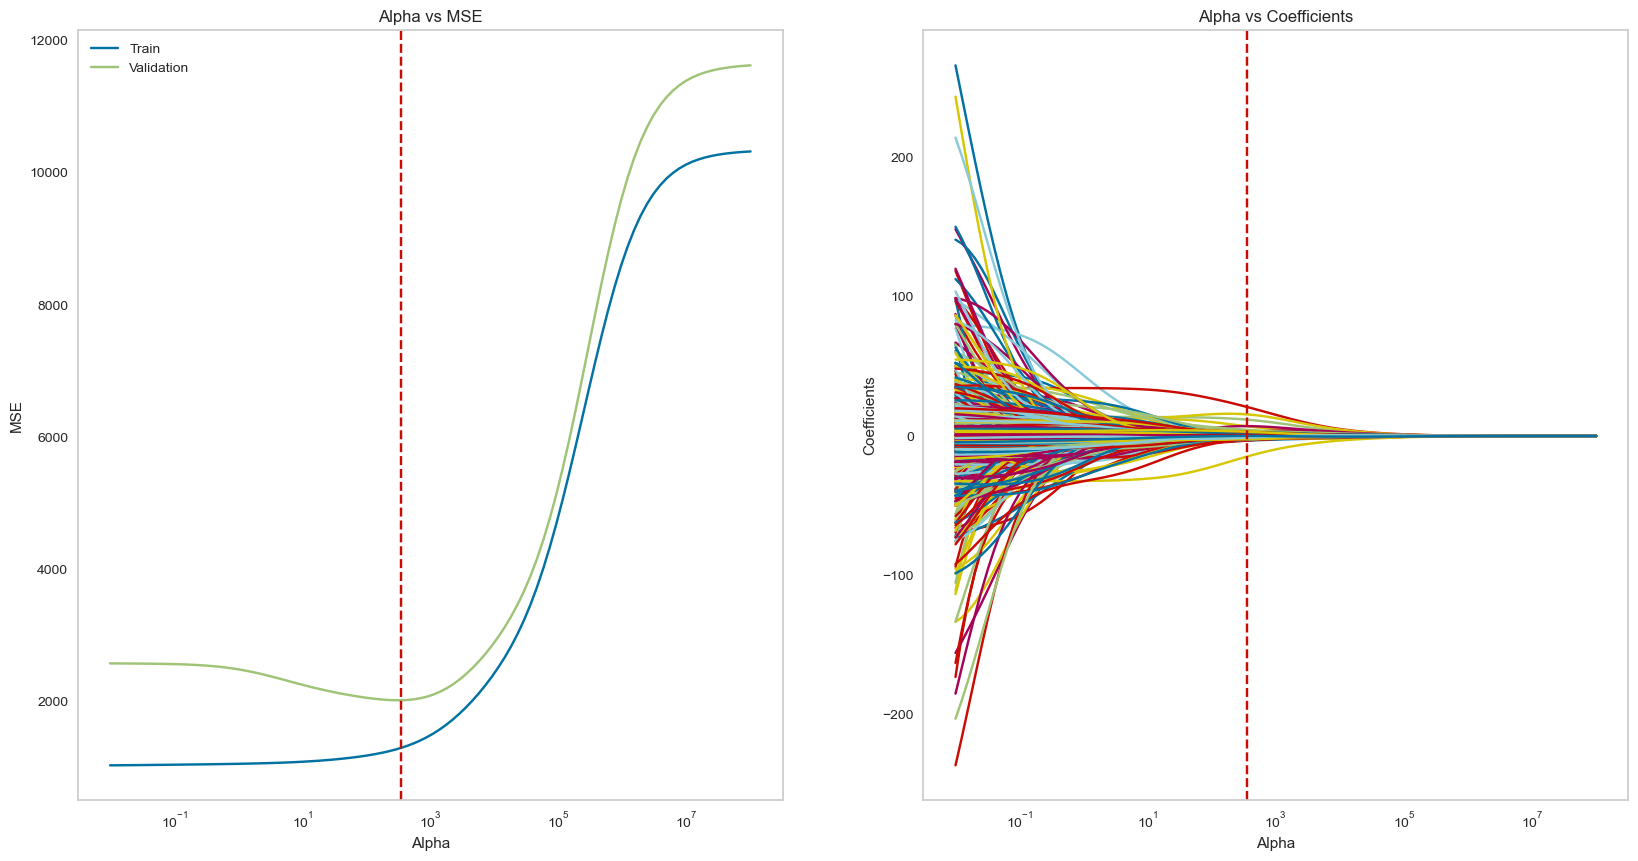

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot 1
ax[0].plot(alphas, mse_train_ridge_experiments, label='Train')
ax[0].plot(alphas, mse_val_ridge_experiments, label='Validation')
ax[0].set_xscale('log')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('MSE')
ax[0].set_title('Alpha vs MSE')
ax[0].legend()
ax[0].axvline(best_alpha, color='r', linestyle='--')
ax[0].grid(False)

# Plot 2
ax[1].plot(alphas, model_ridge_coefficients)
ax[1].set_xscale('log')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('Coefficients')
ax[1].set_title('Alpha vs Coefficients')
ax[1].axvline(best_alpha, color='r', linestyle='--')
ax[1].grid(False)

plt.show()

As the alpha increases, the model coefficients gradually decrease in absolute value until they eventually reach zero. This process encourages simpler models by shrinking the coefficients. Concurrently, the MSE also increases with higher alpha values, suggesting improved overall performance for smaller alpha values.

#### We now fit the model with the best alpha and observe the results 

In [19]:
# Ridge with best alpha
ridge_best = Ridge(alpha=best_alpha)

# Fit the model
ridge_best.fit(X_train_scaled, y_train)

# Predictions
y_pred_val_ridge_best = ridge_best.predict(X_val_scaled)
y_pred_train_ridge_best = ridge_best.predict(X_train_scaled)

# R2 Score

r2_train_ridge_best = r2_score(y_train, y_pred_train_ridge_best)
print(f'R^2 Score on Train: {r2_train_ridge_best}')

r2_val_ridge_best = r2_score(y_val, y_pred_val_ridge_best)
print(f'R^2 Score on Validation: {r2_val_ridge_best}')

# Mean Squared Error

mse_train_ridge_best = mean_squared_error(y_train, y_pred_train_ridge_best)
print(f'Mean Squared Error on Train: {mse_train_ridge_best}')

mse_val_ridge_best = mean_squared_error(y_val, y_pred_val_ridge_best)
print(f'Mean Squared Error on Validation: {mse_val_ridge_best}')

R^2 Score on Train: 0.8741153932015396
R^2 Score on Validation: 0.8260328583418465
Mean Squared Error on Train: 1302.5542952448784
Mean Squared Error on Validation: 2022.7087763984466


##### Cross Validation Score

In [48]:
# Cross Validation
cv_score_ridge = cross_val_score(ridge_best, X_train_scaled, y_train, cv=10)
print(f'Cross Validation Scores: {cv_score_ridge.mean()}')

Cross Validation Scores: 0.8204377265008918


We observe that:
* The R^2 is on train is pretty high, around 87%
* The MSE on train is relatively good, given the size of the dataset
* The same values for validation are around ~83% and 2023, which is different from the train ones, but are comparable
* Cross Validation Score is ~82, which is a high score

Overall, the MSE for validation decreased and R^2 increased, which is a good sign

##### Feature Importance

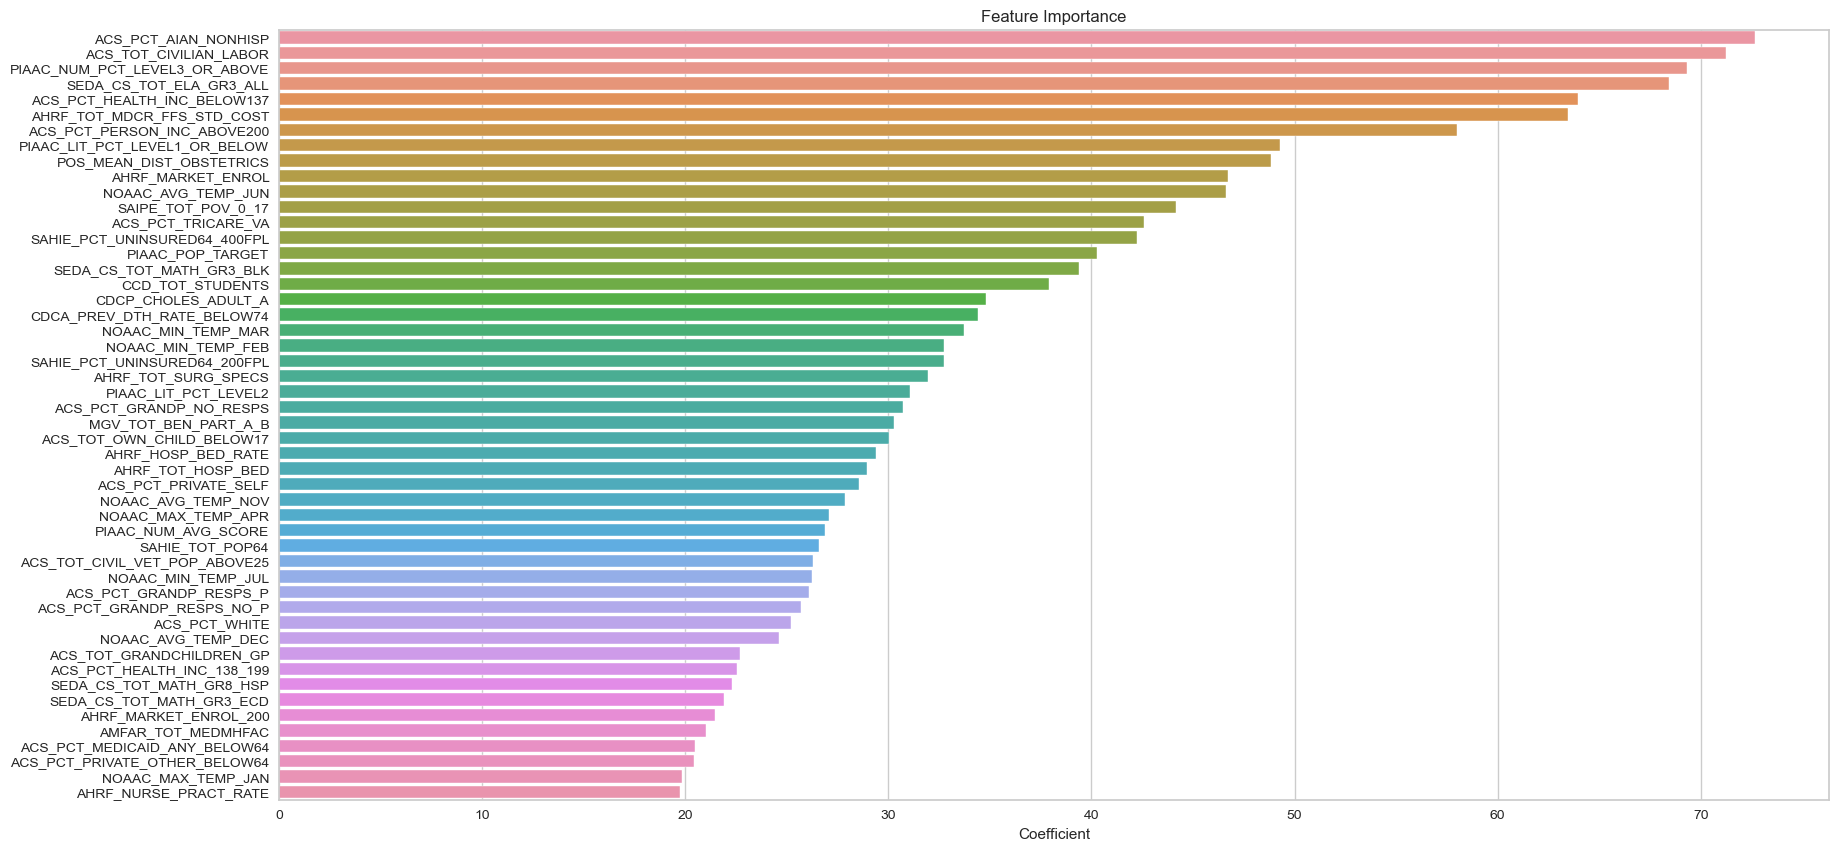

In [46]:
# best features
feature_importance_ridge = pd.DataFrame(data=ridge.coef_, index=X.columns, columns=['Coefficient'])
feature_importance_ridge = feature_importance_ridge.sort_values(by='Coefficient', ascending=False).head(50)
plt.figure(figsize=(20,10))
sns.barplot(x='Coefficient', y=feature_importance_ridge.index, data=feature_importance_ridge)
plt.title('Feature Importance')
plt.show()

Top 10 Social Determinants of Health (SDOH) Variables for Ridge Regression

- **ACS_PCT_AIAN_NONHISP**: Percentage of American Indian and Alaska Native individuals who are non-Hispanic.
- **ACS_TOT_CIVILIAN_LABOR**: Total number of individuals in the civilian labor force.
- **PIAAC_NUM_PCT_LEVEL3_OR_ABOVE**: Number of individuals scoring at level 3 or above on the Programme for the International Assessment of Adult Competencies (PIAAC).
- **SEDA_CS_TOT_ELA_GR3_ALL**: Total number of students in grade 3 achieving proficiency in English Language Arts (ELA) on the Stanford Education Data Archive (SEDA).
- **ACS_PCT_HEALTH_INC_BELOW137**: Percentage of population under 1.37 of the poverty threshold (relevant for health insurance coverage)
- **AHRF_TOT_MDCR_FFS_STD_COST**: Total Medicare fee-for-service standard costs for all medical conditions.
- **ACS_PCT_PERSON_INC_ABOVE200**: Percentage of population with an income to poverty ratio of 2.00 or higher
- **PIAAC_LIT_PCT_LEVEL1_OR_BELOW**: Percentage of individuals scoring at level 1 or below on the PIAAC literacy assessment.
- **POS_MEAN_DIST_OBSTETRICS**: Mean distance to obstetrics services from a given location.
- **AHRF_MARKET_ENROL**: Market enrollment count from the Area Health Resources Files (AHRF).


The top-ranked feature represents the percentage of individuals from a specific demographic group, followed closely by a measure of the total civilian labor force. Educational attainment and academic performance also show considerable importance, alongside socio-economic indicators indicating disparities in health and income levels. Healthcare costs emerge as influential predictors, as do literacy levels and access to obstetrics services.

Seeking better results, we try Random Forest, given that is has a very good predictive power.

#### Model 3: Random Forest Regressor

We expect that Random Forest regression can capture complex interactions between socio-economic and environmental factors and their impact on mortality rates. It can handle non-linear relationships and provide insights into which features are most important for predicting mortality rates.

In [49]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=10)

# Fit the model
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_val_rf = rf.predict(X_val_scaled)
y_pred_train_rf = rf.predict(X_train_scaled)

# R2 Score

r2_train_rf = r2_score(y_train, y_pred_train_rf)
print(f'R^2 Score on Train: {r2_train_rf}')

r2_val_rf = r2_score(y_val, y_pred_val_rf)
print(f'R^2 Score on Validation: {r2_val_rf}')

# Mean Squared Error

mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
print(f'Mean Squared Error on Train: {mse_train_rf}')

mse_val_rf = mean_squared_error(y_val, y_pred_val_rf)
print(f'Mean Squared Error on Validation: {mse_val_rf}')

R^2 Score on Train: 0.9759234398650835
R^2 Score on Validation: 0.8394738540124647
Mean Squared Error on Train: 249.12519184069663
Mean Squared Error on Validation: 1866.4308744489163


We observe that:
* The R^2 is on train is pretty high, around 97%
* The MSE on train is relatively good, given the size of the dataset
* The same values for validation are around 83% and 1866, which is different from the train ones

##### Hyperparameter Tuning

In [50]:
# Hyperparameter tuning
param_grid = {'n_estimators': [5, 10, 20], 'max_depth': [5, 10, 20], 'min_samples_leaf': [1, 2, 4], 'max_features': [ 'sqrt', 'log2']}
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='r2')

# Grid Search
grid_search.fit(X_train_scaled, y_train)

# Best parameters
grid_search.best_params_
print(f'Best Parameters: {grid_search.best_params_}')

# Best model
rf_best = grid_search.best_estimator_

# Predictions
y_pred_test_rf_best = rf_best.predict(X_test_scaled)
y_pred_train_rf_best = rf_best.predict(X_train_scaled)

# R2 Score

r2_train_rf_best = r2_score(y_train, y_pred_train_rf_best)
print(f'R^2 Score on Train: {r2_train_rf_best}')

# Mean Squared Error

mse_train_rf_best = mean_squared_error(y_train, y_pred_train_rf_best)
print(f'Mean Squared Error on Train: {mse_train_rf_best}')

# Best R^2 and MSE test
r2_test_rf_best = r2_score(y_test, y_pred_test_rf_best)
mse_test_rf_best = mean_squared_error(y_test, y_pred_test_rf_best)

print(f'R^2 Score on Test: {r2_test_rf_best}')
print(f'Mean Squared Error on Test: {mse_test_rf_best}')

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 20}
R^2 Score on Train: 0.9178697859887825
Mean Squared Error on Train: 849.818462720899
R^2 Score on Test: 0.6896654096168611
Mean Squared Error on Test: 3255.9705186670512


##### Cross Validation

In [51]:
# Cross validation
cv_score_rf_best = cross_val_score(rf_best, X_train_scaled, y_train, cv=10, scoring='r2')
print(f'Cross Validation Score: {cv_score_rf_best.mean()}')

Cross Validation Score: 0.7650019150045141


We observe:
* The R^2 score of around 0.92, which is decently high, which might suggest possible over-fitting
* The MSE is 849, which is better than the linear regression but worse than ridge
* The same for test are around 69% and 3255 respectively, which is relatively off from the train ones.
* It also has a decent CV score around 0.77

Overall, the performance does not get much better after hyperparameter tuning. The R^2 is pretty high in general in both the situations, suggesting that the model might be overfitting

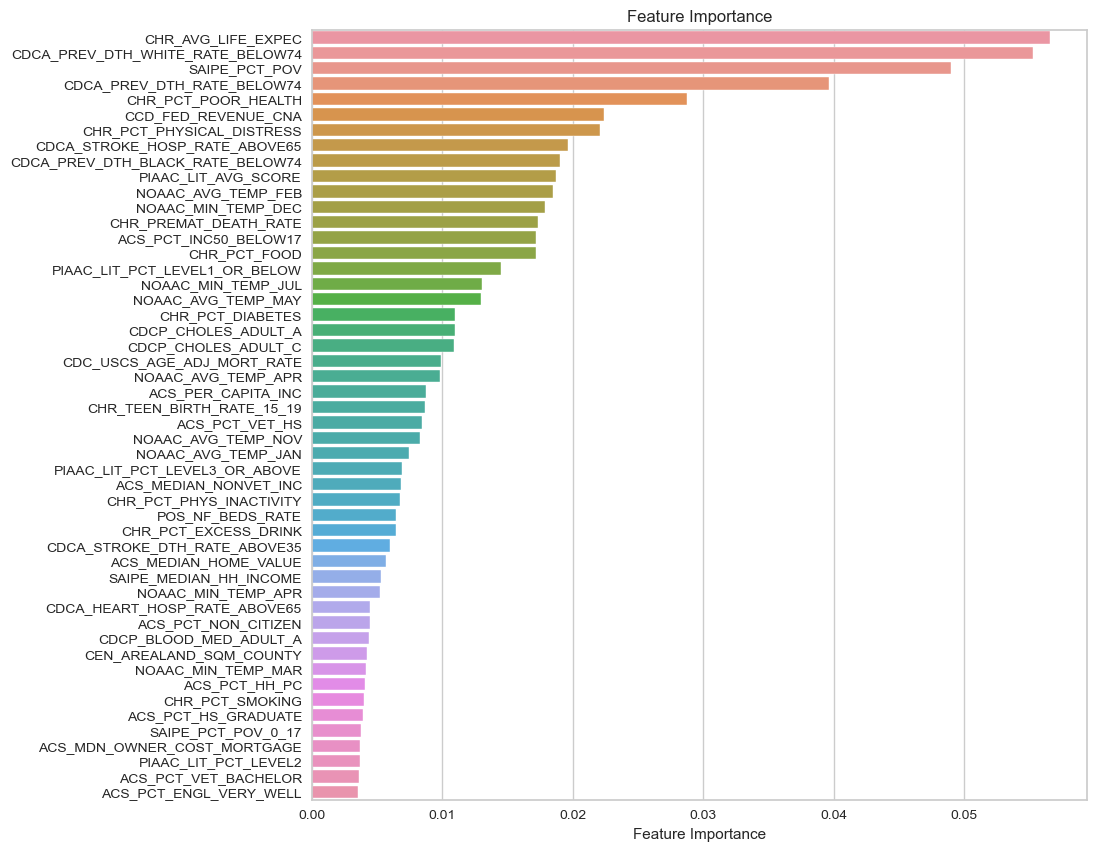

In [63]:
# Important Features
feature_importance_rf = pd.DataFrame(data=rf_best.feature_importances_, index=X_train.columns, columns=['Feature Importance'])
feature_importance_rf = feature_importance_rf.sort_values(by='Feature Importance', ascending=False).head(50)

plt.figure(figsize=(10, 10))
sns.barplot(x=feature_importance_rf['Feature Importance'], y=feature_importance_rf.index)
plt.title('Feature Importance')
plt.show()

Top 10 Social Determinants of Health (SDOH) Variables for Random Rorest

1. **CHR_AVG_LIFE_EXPEC**: Average life expectancy in a given community health region.
2. **CDCA_PREV_DTH_WHITE_RATE_BELOW74**: Prevalence of death rates among white individuals below the age of 74, according to the Centers for Disease Control and Prevention (CDC).
3. **SAIPE_PCT_POV**: Percentage of individuals living below the poverty line based on the Small Area Income and Poverty Estimates (SAIPE).
4. **CDCA_PREV_DTH_RATE_BELOW74**: Prevalence of death rates below the age of 74, according to the Centers for Disease Control and Prevention (CDC).
5. **CHR_PCT_POOR_HEALTH**: Percentage of individuals in a community health region reporting poor health status.
6. **CCD_FED_REVENUE_CNA**: Federal revenue allocated for community health programs.
7. **CHR_PCT_PHYSICAL_DISTRESS**: Percentage of individuals in a community health region experiencing physical distress.
8. **CDCA_STROKE_HOSP_RATE_ABOVE65**: Stroke hospitalization rate among individuals above the age of 65, according to the Centers for Disease Control and Prevention (CDC).
9. **CDCA_PREV_DTH_BLACK_RATE_BELOW74**: Prevalence of death rates among black individuals below the age of 74, according to the Centers for Disease Control and Prevention (CDC).
10. **PIAAC_LIT_AVG_SCORE**: Average literacy score based on the Programme for the International Assessment of Adult Competencies (PIAAC).


At the top of the list is how long people live on average, which makes sense since good health is key to everything else. Right after that, we see how mortality rates, poverty levels, and overall health status play crucial roles too. It's a reminder that our well-being is deeply tied to our surroundings and circumstances. The fact that federal funds for community health programs also rank high shows that investing in people's health pays off big time. And then there are things like how physically stressed people feel and how well they can read, which also matter a lot.

#### Model 4: Support Vector Regression

SVR is a regression algorithm that finds the hyperplane that best fits the data while minimizing the error. It's effective in high-dimensional spaces and suitable for cases where the number of features is greater than the number of samples.
SVR can predict mortality rates from heart disease based on socio-economic and environmental factors while maximizing the margin between data points and the hyperplane. It considers the spatial distribution of data points in the feature space and finds the optimal hyperplane that separates them, making accurate predictions.

In [53]:
# Support Vector Regression
svr = SVR()

# Fit the model
svr.fit(X_train_scaled, y_train)

# Predictions
y_pred_val_svr = svr.predict(X_val_scaled)
y_pred_train_svr = svr.predict(X_train_scaled)

# R2 Score

r2_train_svr = r2_score(y_train, y_pred_train_svr)
print(f'R^2 Score on Train: {r2_train_svr}')

r2_val_svr = r2_score(y_val, y_pred_val_svr)
print(f'R^2 Score on Validation: {r2_val_svr}')

# Mean Squared Error

mse_train_svr = mean_squared_error(y_train, y_pred_train_svr)
print(f'Mean Squared Error on Train: {mse_train_svr}')

mse_val_svr = mean_squared_error(y_val, y_pred_val_svr)
print(f'Mean Squared Error on Validation: {mse_val_svr}')

R^2 Score on Train: 0.4646782829058377
R^2 Score on Validation: 0.4534921221350402
Mean Squared Error on Train: 5539.085513888205
Mean Squared Error on Validation: 6354.224541439635


We observe:

* The R^2 score of about 0.46, which suggests that it is underperforming
* The MSE of around 5700 suggests that it is not doing as good as previous models
* For validation set, R^2 and MSE values are worse, meaning we might have to set hyperparameters.

##### Hyperparameter tuning

In [54]:
# Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5], 'kernel': ['linear', 'poly']}
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2')

# Grid Search
grid_search.fit(X_train_scaled, y_train)

# Best parameters
grid_search.best_params_

# Best model
svr_best = grid_search.best_estimator_

# Predictions
y_pred_val_svr_best = svr_best.predict(X_val_scaled)
y_pred_train_svr_best = svr_best.predict(X_train_scaled)

# R2 Score
r2_train_svr_best = r2_score(y_train, y_pred_train_svr_best)
print(f'R^2 Score on Train: {r2_train_svr_best}')

r2_val_svr_best = r2_score(y_val, y_pred_val_svr_best)
print(f'R^2 Score on Validation: {r2_val_svr_best}')

# Mean Squared Error
mse_train_svr_best = mean_squared_error(y_train, y_pred_train_svr_best)
print(f'Mean Squared Error on Train: {mse_train_svr_best}')

mse_val_svr_best = mean_squared_error(y_val, y_pred_val_svr_best)
print(f'Mean Squared Error on Validation: {mse_val_svr_best}')

print("")

# Best Parameters
print(f'Best Parameters: {grid_search.best_params_}')

R^2 Score on Train: 0.8579299884221694
R^2 Score on Validation: 0.831114969992107
Mean Squared Error on Train: 1470.0280559517632
Mean Squared Error on Validation: 1963.6192739806952

Best Parameters: {'C': 0.1, 'epsilon': 0.5, 'kernel': 'linear'}


##### Cross Validation score

In [55]:
# Cross validation
cv_score_svr_best = cross_val_score(svr_best, X_train_scaled, y_train, cv=10, scoring='r2')
print(f'Cross Validation Score: {cv_score_svr_best.mean()}')

Cross Validation Score: 0.8177631139345779


We observe that 
* The R^2 on train is ~0.86 and the MSE is 1479, which is decent in this case
* The same on validation is 0.83 and 1963 respectively, whihc is not too off from train
* The CV score is relatively good at 0.81, which suggest that model works well

Overall, the performance of the model increases considerably.

##### Feature Importance

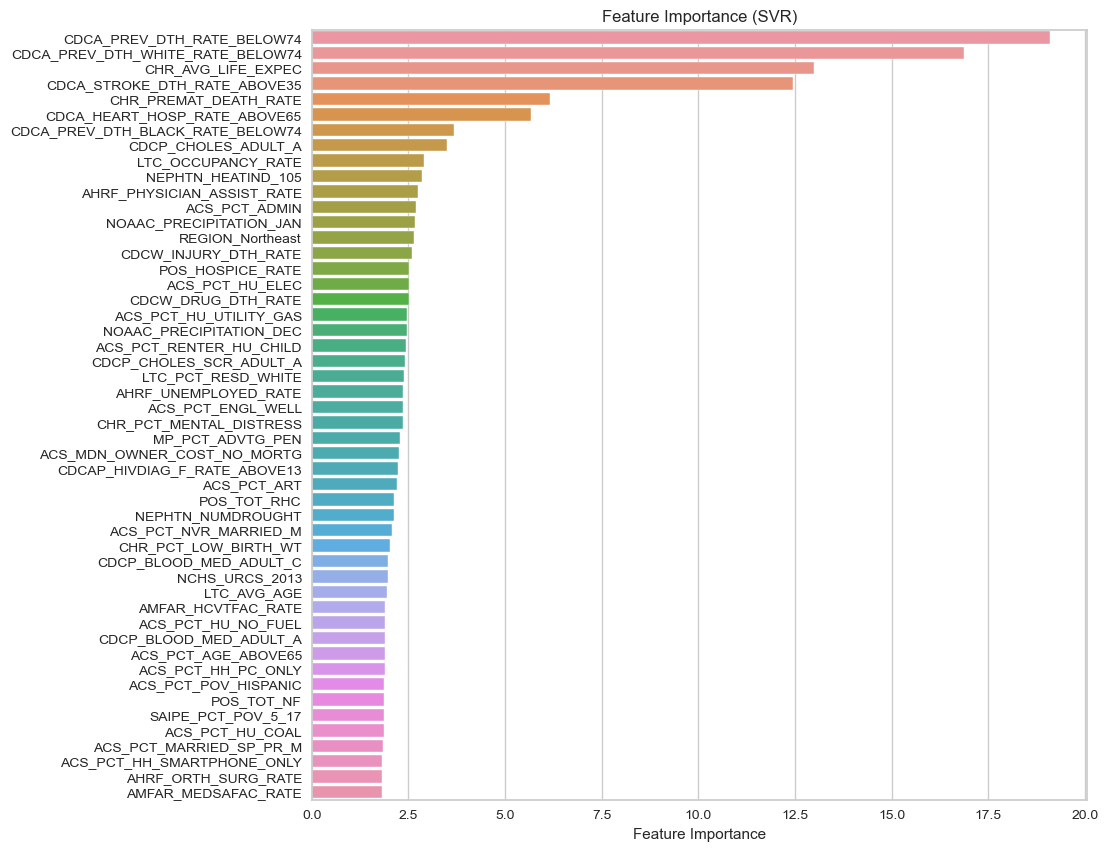

In [56]:
# Feature importance

feature_importance_svr = pd.DataFrame(data=svr_best.coef_.flatten(), index=X_train.columns, columns=['Feature Importance'])
feature_importance_svr = feature_importance_svr.abs().sort_values(by='Feature Importance', ascending=False).head(50)

# Plot feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x=feature_importance_svr['Feature Importance'], y=feature_importance_svr.index)
plt.title('Feature Importance (SVR)')
plt.show()



Top 10 Social Determinants of Health (SDOH) Variables for SVR

1. **CDCA_PREV_DTH_RATE_BELOW74**: Prevalence of death rates below the age of 74, according to the Centers for Disease Control and Prevention (CDC).
2. **CDCA_PREV_DTH_WHITE_RATE_BELOW74**: Prevalence of death rates among white individuals below the age of 74
3. **CHR_AVG_LIFE_EXPEC**: Average life expectancy in a given community health region.
4. **CDCA_STROKE_DTH_RATE_ABOVE35**: Stroke death rate among individuals above the age of 35
5. **CHR_PREMAT_DEATH_RATE**: Rate of premature deaths in a community health region.
6. **CDCA_HEART_HOSP_RATE_ABOVE65**: Heart hospitalization rate among individuals above the age of 65
7. **CDCA_PREV_DTH_BLACK_RATE_BELOW74**: Prevalence of death rates among black individuals below the age of 74
8. **CDCP_CHOLES_ADULT_A**: Percentage of adults diagnosed with high cholesterol
9. **LTC_OCCUPANCY_RATE**: Long-term care facility occupancy rate
10. **NEPHTN_HEATIND_105**: Rate of individuals experiencing heat index values above 105 degrees Fahrenheit in a given region.


At the forefront, we find the prevalence of death rates under 74, signaling its substantial influence on the results. Delving deeper, we uncover insights into specific demographic groups, such as white and black individuals, underscoring the imperative of addressing health disparities. Additionally, factors like life expectancy and stroke rates emerge as significant contributors, providing valuable insights into the broader determinants of health outcomes.

#### Summary of results

In [59]:
results = pd.DataFrame({'Model': ['Linear Regression', 'Ridge Ridge', 'Random Forest Regression', 'Support Vector Regression'],
                        'R2 Train': [r2_train_lr, r2_train_ridge_best, r2_train_rf_best, r2_train_svr_best],
                        'R2 Validation': [r2_val_lr, r2_val_ridge_best, r2_test_rf_best, r2_val_svr_best],
                        'MSE Train': [mse_train_lr, mse_train_ridge_best, mse_train_rf_best, mse_train_svr_best],
                        'MSE Validation': [mse_val_lr, mse_val_ridge_best, mse_test_rf_best, mse_val_svr_best],
                        'Cross Validation Score': [cv_score_lr.mean(), cv_score_ridge.mean(), cv_score_rf_best.mean(), cv_score_svr_best.mean()]})

results

,Model,R2 Train,R2 Validation,MSE Train,MSE Validation,Cross Validation Score
0,Linear Regression,0.903964,0.770704,993.704453,2666.017457,-3.187280
1,Ridge Ridge,0.874115,0.826033,1302.554295,2022.708776,0.820438
2,Random Forest Regression,0.917870,0.689665,849.818463,3255.970519,0.765002
3,Support Vector Regression,0.857930,0.831115,1470.028056,1963.619274,0.817763


We suggest that ***Ridge Regression*** is the best model in this case.
\
Ridge regression appears to be the best model for predicting heart disease-related mortality in this context, as it demonstrates relatively low test and train MSE and high test and train R^2, and a reasonably high feature importance scores. While Random Forest exhibits good performance performance, its higher MSEs and R^2 scores compared to Ridge regression suggests potential overfitting, making Ridge regression the preferred choice in this scenario.\
In this case, SVR might not be the optimal choice due to its higher computational complexity and the challenge of hyperparameter tuning, especially with a large number of features. This can be seen by the fact that even with a small number of features in paramgrid, the process took a long time. It took longer with increasing the CV folds and hyperparameters. Given these advantages, Ridge Regression stands out as the more efficient and effective model.

##### Testing Ridge with the best parameters on the test set

In [20]:
y_pred_test_ridge_best = ridge_best.predict(X_test_scaled)

# R2 Score
r2_test_ridge_best = r2_score(y_test, y_pred_test_ridge_best)
print(f'R^2 Score on Test: {r2_test_ridge_best}')

r2_train_ridge_best = r2_score(y_train, y_pred_train_ridge_best)
print(f'R^2 Score on Train: {r2_train_ridge_best}')

# Mean Squared Error
mse_test_ridge_best = mean_squared_error(y_test, y_pred_test_ridge_best)
print(f'Mean Squared Error on Test: {mse_test_ridge_best}')

mse_train_ridge_best = mean_squared_error(y_train, y_pred_train_ridge_best)
print(f'Mean Squared Error on Train: {mse_train_ridge_best}')

R^2 Score on Test: 0.8061779961705384
R^2 Score on Train: 0.8741153932015396
Mean Squared Error on Test: 2033.542988419595
Mean Squared Error on Train: 1302.5542952448784


The model performs well in predicting heart disease-related deaths, with an R^2 score of approximately 0.81 and a MSE of 2033, indicating a solid level of predictive accuracy

##### References
1. Machine Learning Foundations with Python: Lectures, Labs, Homeworks and In-class exercises
2. https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/#:~:text=SVR%20can%20handle%20non%2Dlinear,variables%20and%20the%20target%20variable.
3. https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0
4. https://www.reddit.com/r/datascience/comments/bnha0c/when_would_you_use_a_svm_of_regression_and_vice/
5. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
6. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10888224/
7. https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/